In [1]:
import dataloader as dal

In [2]:
import pandas as pd
import numpy as np

In [27]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [19]:
import quantstats as qs

# PLT style

In [4]:
dl = dal.dataloader()
_=dl.get_slist()
dl.filter_slist(pd.to_datetime('2014-01-01'))
dl.get_sdata_tdx('E:/s/tdx/',start="2018/01/01",end='2021/01/31')

100%|██████████| 197/197 [00:03<00:00, 49.34it/s]


,,open,high,low,close,volume,amount
date,code,,,,,,
2018-01-02,000001,12.44,13.02,12.41,12.79,208159200.0,2.856543e+09
2018-01-03,000001,12.82,12.95,12.29,12.42,296249792.0,4.006220e+09
2018-01-04,000001,12.41,12.46,12.22,12.34,185450896.0,2.454543e+09
2018-01-05,000001,12.30,12.44,12.24,12.39,121031200.0,1.603289e+09
2018-01-08,000001,12.34,12.38,11.95,12.05,215862000.0,2.806099e+09
...,...,...,...,...,...,...,...
2021-01-25,300274,98.75,113.37,97.56,102.25,81047212.0,8.559588e+09
2021-01-26,300274,98.75,100.03,94.12,95.33,86710593.0,8.400924e+09
2021-01-27,300274,97.64,104.25,92.26,104.25,72114934.0,7.084138e+09


In [40]:
mpl.rcParams.update(mpl.rcParamsDefault)

In [44]:
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use(style='seaborn-whitegrid')
#sns.set_style("white")
# 设置matplotlib正常显示中文
plt.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
plt.rcParams['axes.unicode_minus']=False 

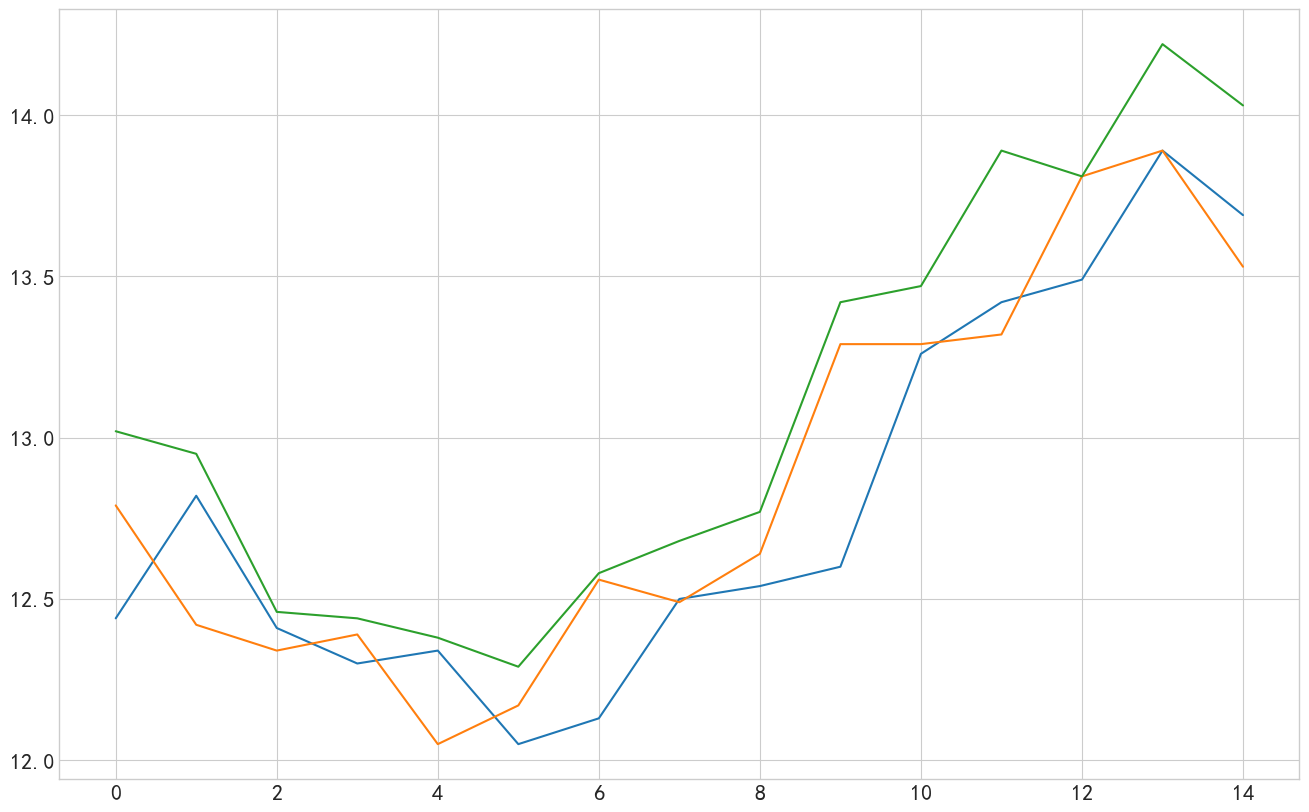

In [45]:
plt.plot(dl.sdata.open[:15].values)
plt.plot(dl.sdata.close[:15].values)
plt.plot(dl.sdata.high[:15].values)

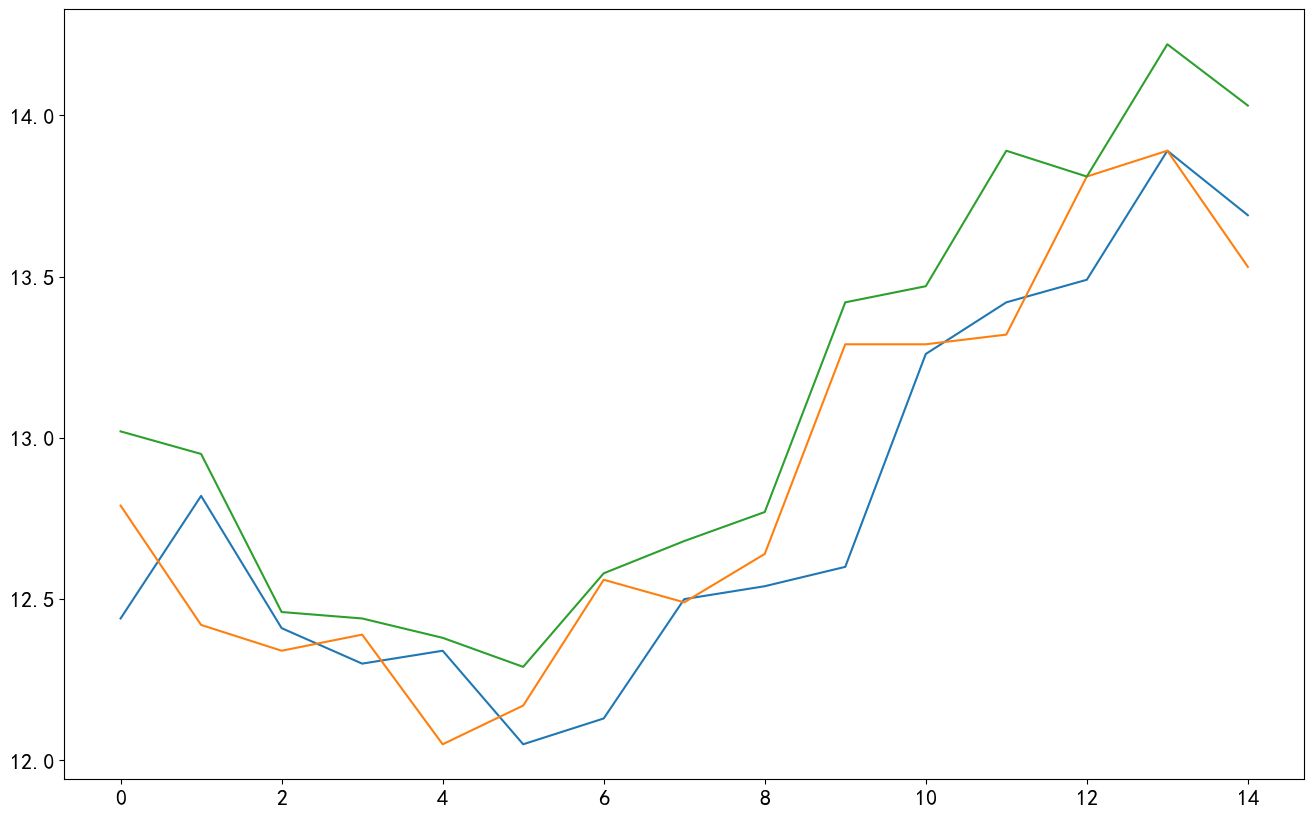

In [42]:
plt.plot(dl.sdata.open[:15].values)
plt.plot(dl.sdata.close[:15].values)
plt.plot(dl.sdata.high[:15].values)

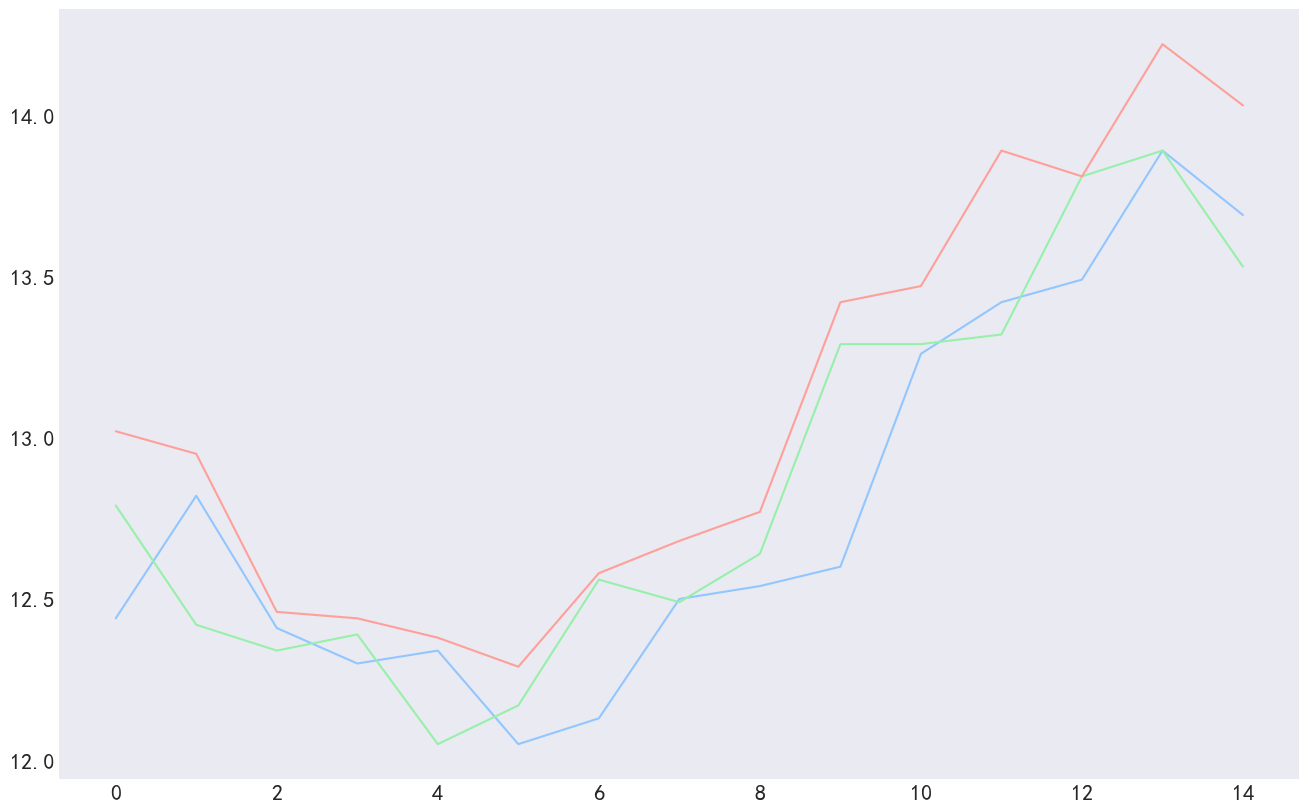

In [35]:
plt.plot(dl.sdata.open[:15].values)
plt.plot(dl.sdata.close[:15].values)
plt.plot(dl.sdata.high[:15].values)

# Alphalens

In [4]:
dl = dal.dataloader()
_=dl.get_slist()
dl.filter_slist(pd.to_datetime('2014-01-01'))

array(['000166', '001289', '001979', '002709', '002714', '002736',
       '002791', '002812', '002821', '002841', '002916', '002920',
       '002938', '003816', '300408', '300413', '300433', '300450',
       '300454', '300496', '300498', '300529', '300595', '300601',
       '300628', '300661', '300750', '300751', '300759', '300760',
       '300763', '300782', '300866', '300896', '300919', '300957',
       '300979', '300999', '600025', '600905', '600918', '600919',
       '600926', '600941', '600958', '600989', '601021', '601066',
       '601138', '601155', '601211', '601225', '601229', '601236',
       '601319', '601658', '601698', '601728', '601816', '601825',
       '601838', '601865', '601868', '601878', '601881', '601916',
       '601966', '601985', '601995', '603019', '603087', '603160',
       '603185', '603195', '603259', '603260', '603288', '603290',
       '603369', '603392', '603486', '603501', '603659', '603799',
       '603806', '603833', '603882', '603899', '603986', '6054

In [5]:
dl.get_sdata_tdx('E:/s/tdx/',start="2018/01/01",end='2021/01/31')

100%|██████████| 197/197 [00:04<00:00, 43.61it/s]


,,open,high,low,close,volume,amount
date,code,,,,,,
2018-01-02,000001,12.44,13.02,12.41,12.79,208159200.0,2.856543e+09
2018-01-03,000001,12.82,12.95,12.29,12.42,296249792.0,4.006220e+09
2018-01-04,000001,12.41,12.46,12.22,12.34,185450896.0,2.454543e+09
2018-01-05,000001,12.30,12.44,12.24,12.39,121031200.0,1.603289e+09
2018-01-08,000001,12.34,12.38,11.95,12.05,215862000.0,2.806099e+09
...,...,...,...,...,...,...,...
2021-01-25,300274,98.75,113.37,97.56,102.25,81047212.0,8.559588e+09
2021-01-26,300274,98.75,100.03,94.12,95.33,86710593.0,8.400924e+09
2021-01-27,300274,97.64,104.25,92.26,104.25,72114934.0,7.084138e+09


In [6]:
dl.sdata['factor']=dal.alpha_6(dl.sdata)

In [9]:
dl.sdata['factor']=dal.shift_ndate(dl.sdata.factor,1)

Dropped 3.0% entries from factor data: 3.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-0.993560,0.135642,-0.631797,0.159021,28721,20.274315
2,-0.875167,0.486947,-0.358047,0.170686,28173,19.887479
3,-0.793000,0.731816,-0.147598,0.188506,28136,19.861360
4,-0.653784,0.848617,0.078243,0.193982,28173,19.887479
5,-0.304455,0.983325,0.426053,0.215172,28459,20.089368


Returns Analysis


,1D,5D,10D
Ann. alpha,0.104,0.079,0.070
beta,0.004,-0.009,-0.022
Mean Period Wise Return Top Quantile (bps),4.634,4.548,3.840
Mean Period Wise Return Bottom Quantile (bps),-4.485,-2.442,-2.057
Mean Period Wise Spread (bps),9.119,6.997,5.901


<Figure size 432x288 with 0 Axes>

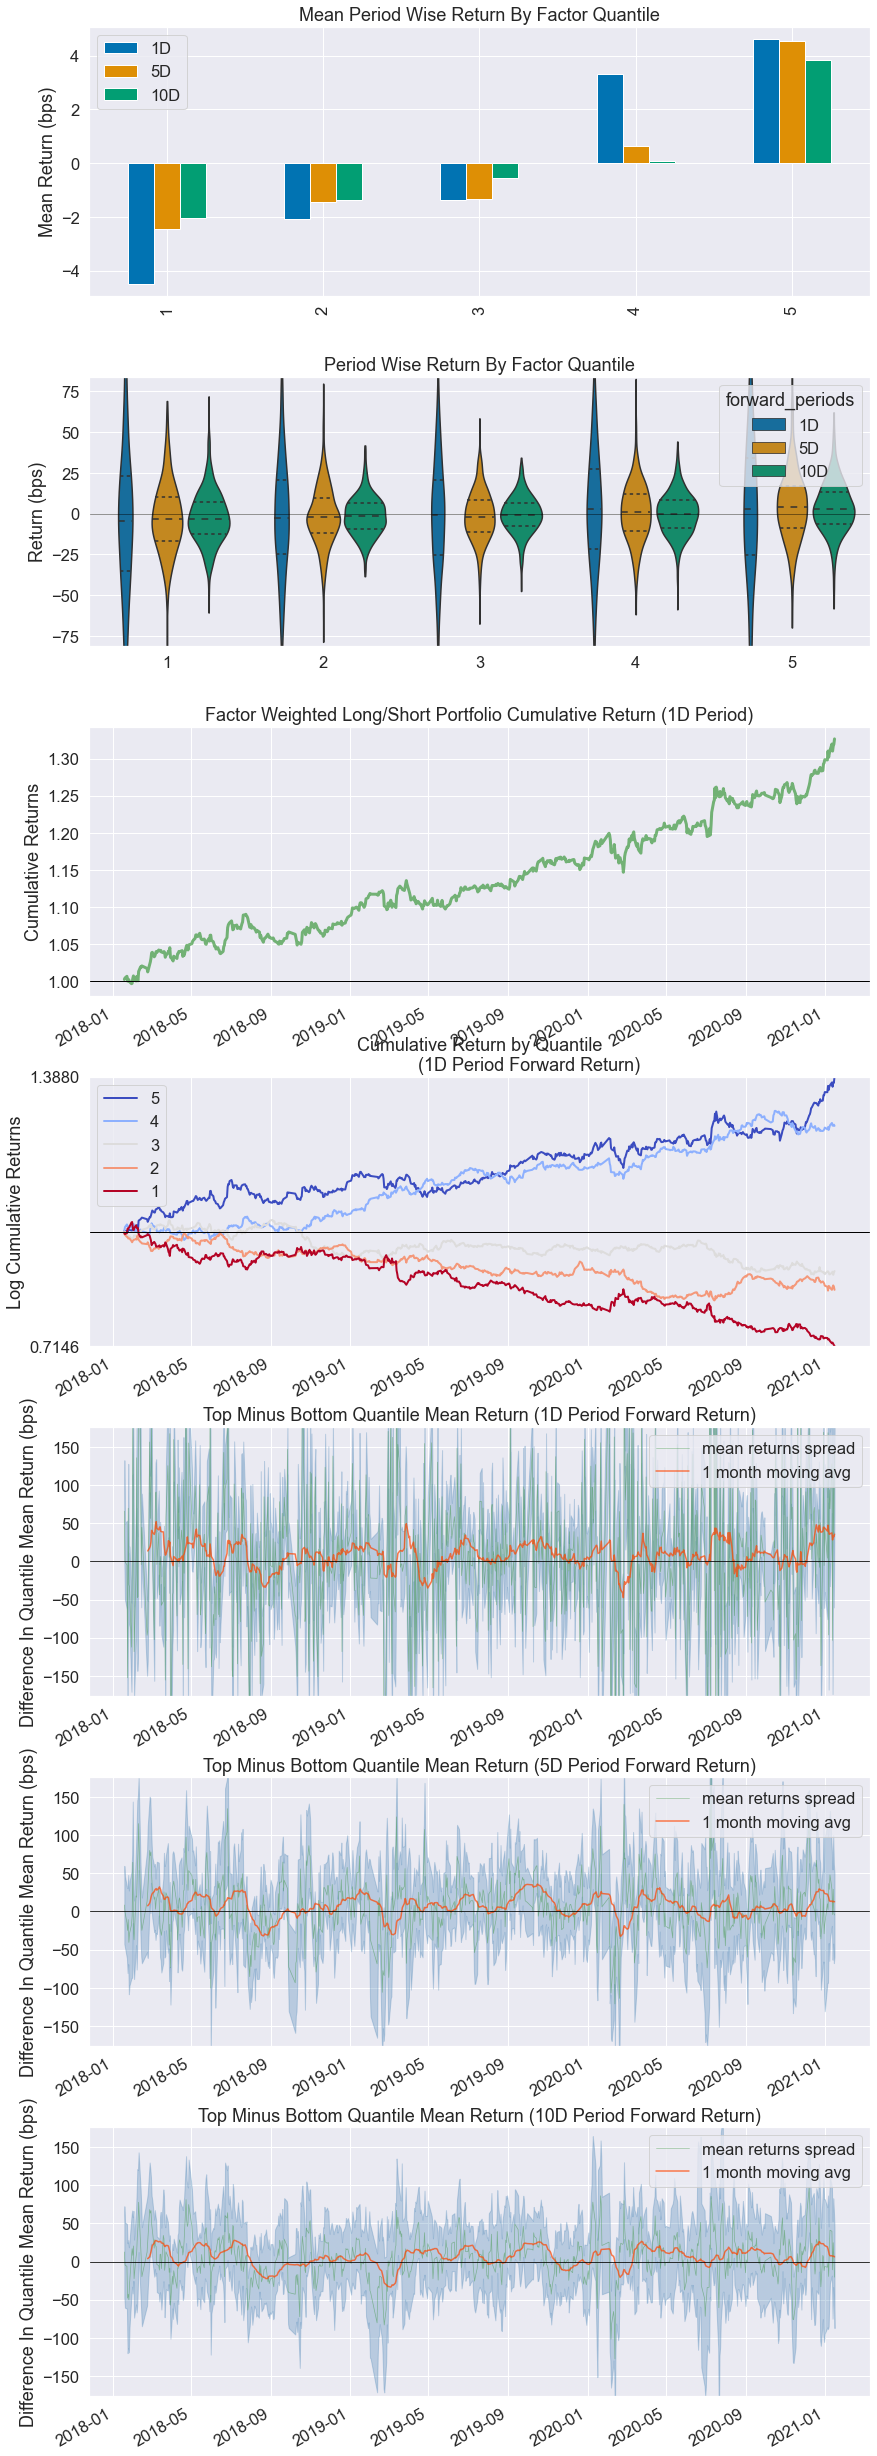

Information Analysis


,1D,5D,10D
IC Mean,0.015,0.033,0.039
IC Std.,0.130,0.128,0.127
Risk-Adjusted IC,0.117,0.253,0.306
t-stat(IC),3.158,6.839,8.264
p-value(IC),0.002,0.000,0.000
IC Skew,0.031,-0.074,-0.242
IC Kurtosis,0.190,0.196,0.509


d:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

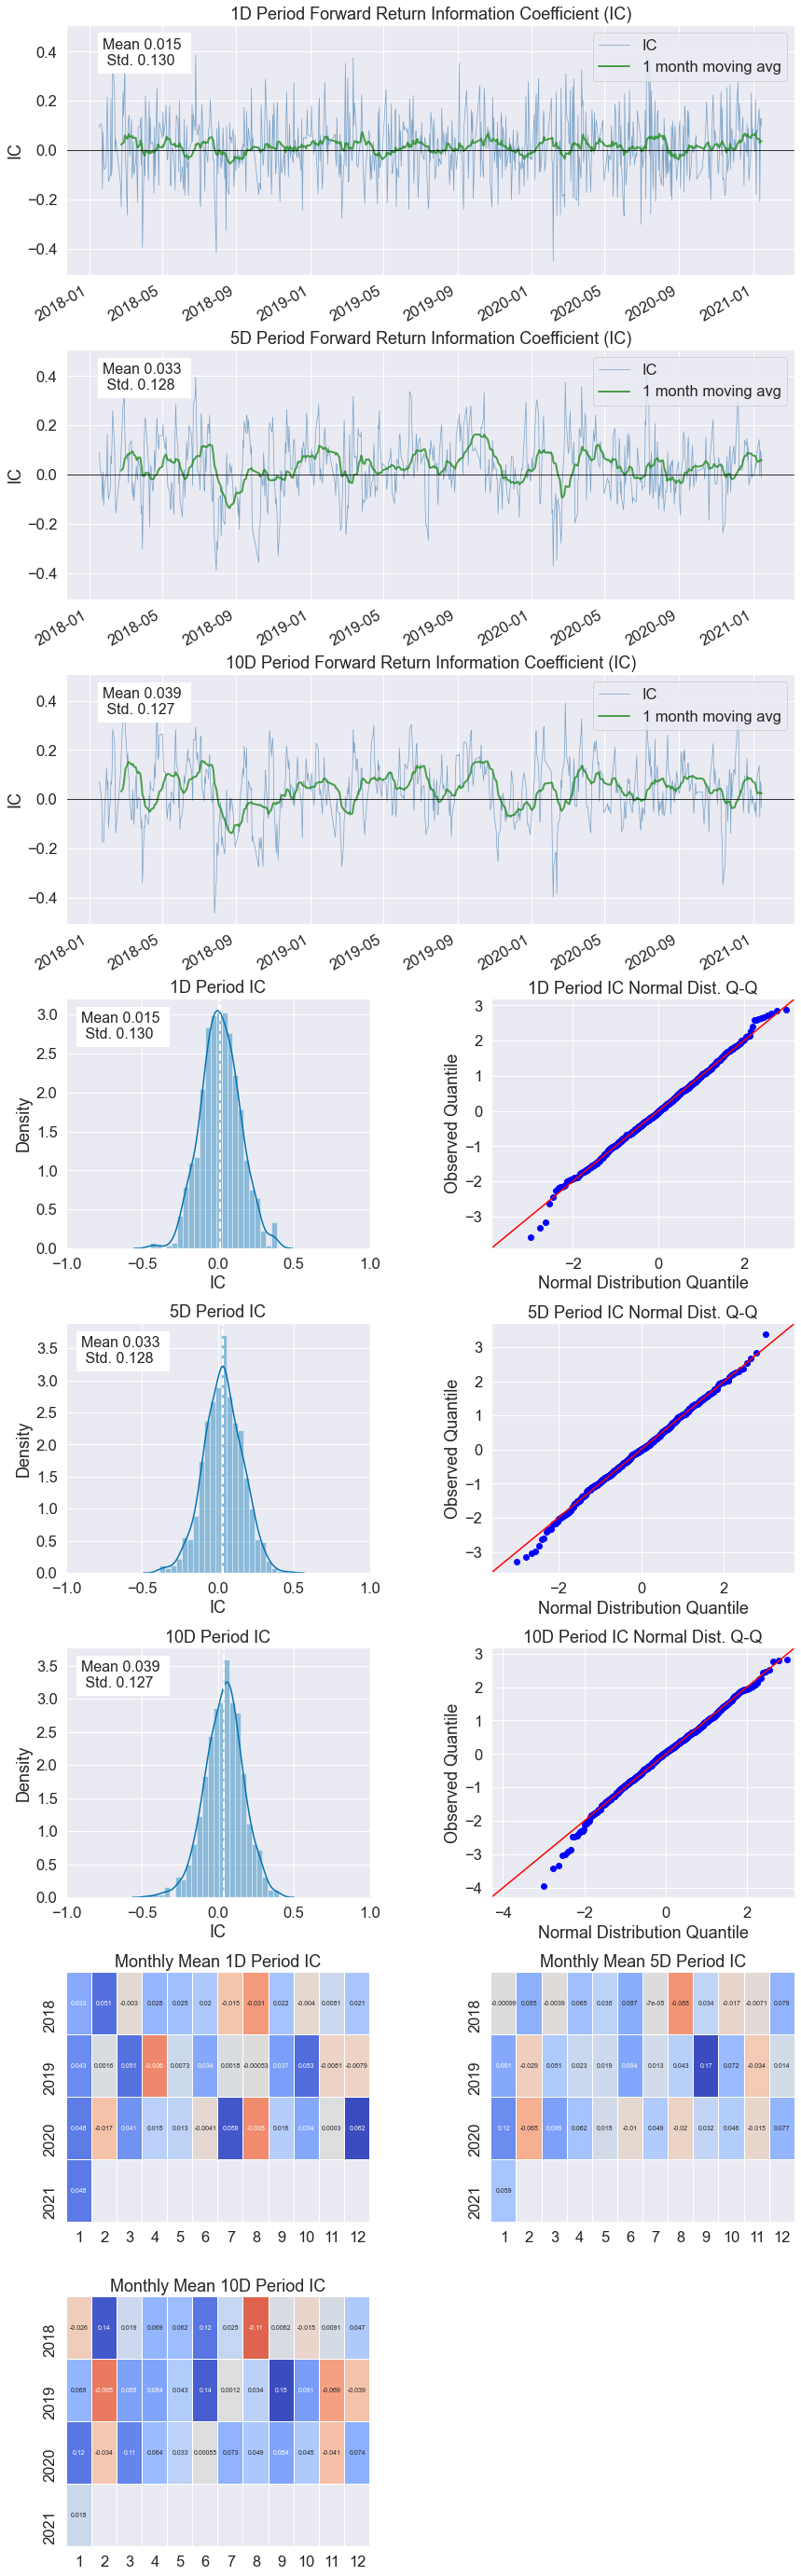

d:\anaconda\lib\site-packages\alphalens\utils.py:910: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(


Turnover Analysis


,1D,5D,10D
Quantile 1 Mean Turnover,0.284,0.681,0.751
Quantile 2 Mean Turnover,0.521,0.778,0.793
Quantile 3 Mean Turnover,0.560,0.788,0.800
Quantile 4 Mean Turnover,0.524,0.775,0.795
Quantile 5 Mean Turnover,0.288,0.681,0.751


,1D,5D,10D
Mean Factor Rank Autocorrelation,0.835,0.254,0.102


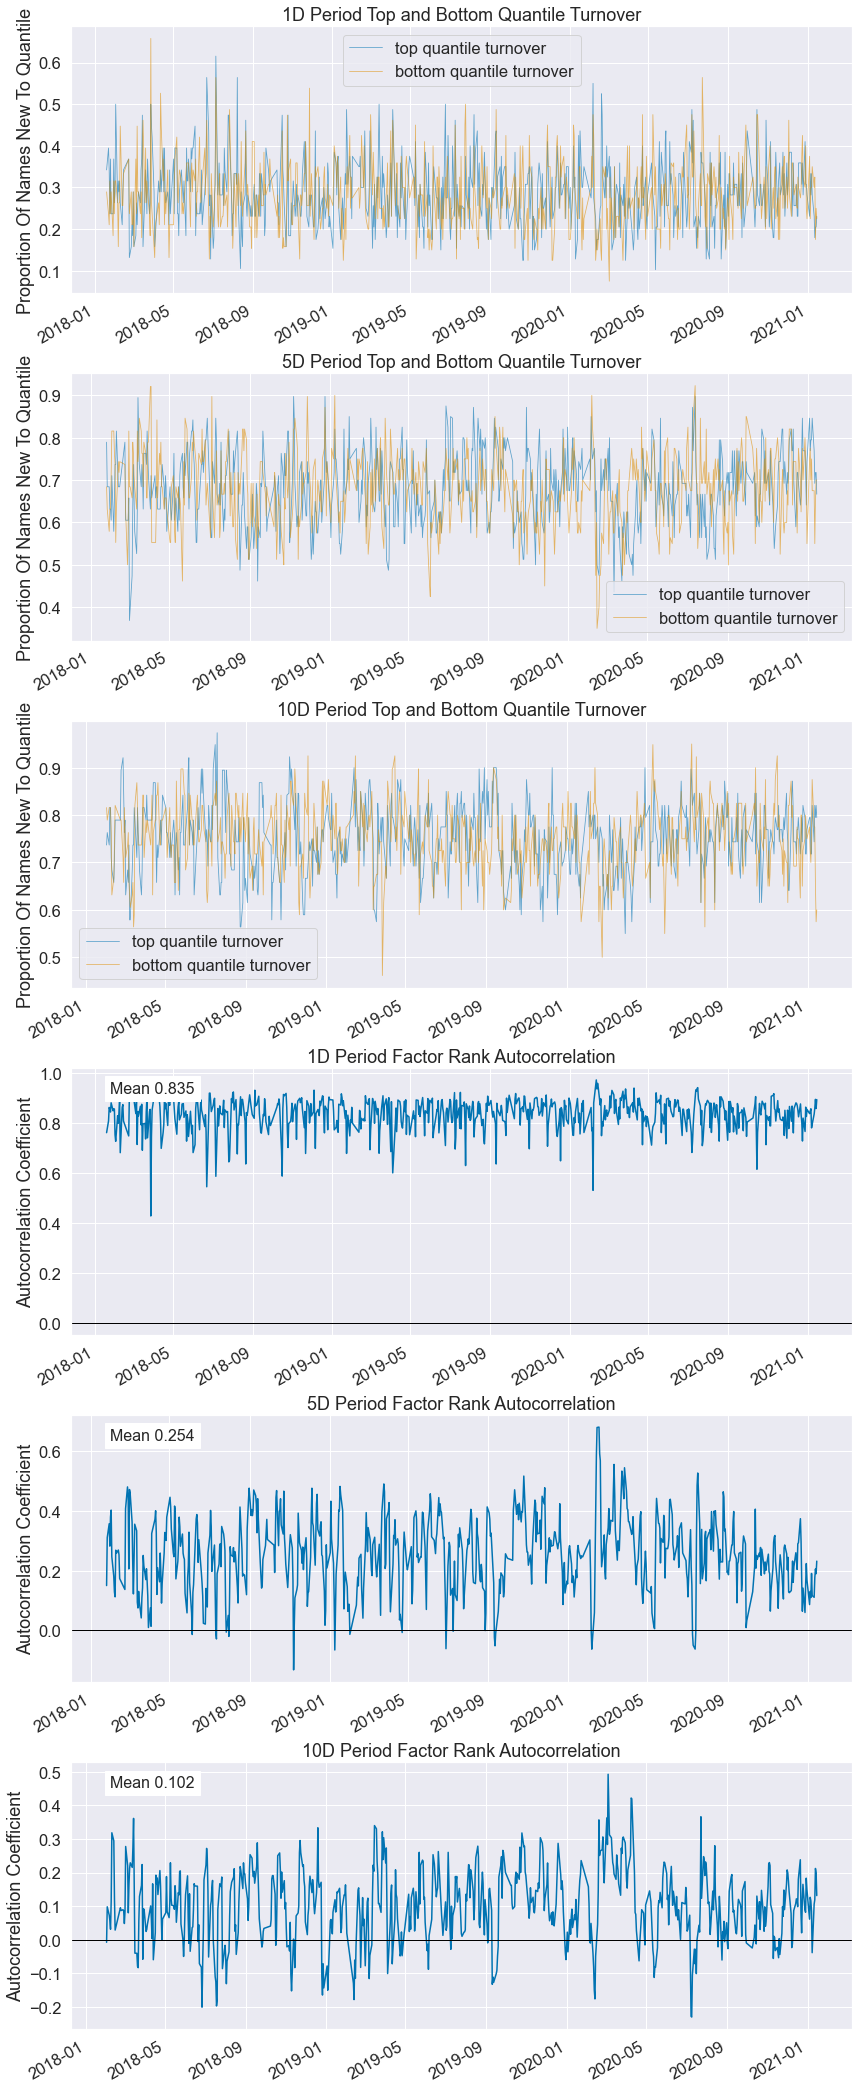

,,1D,5D,10D,factor,factor_quantile
date,asset,,,,,
2018-01-18,000001,0.029652,0.003706,-0.033358,-0.489628,1
2018-01-19,000001,-0.014399,-0.044636,-0.064075,-0.466992,1
2018-01-22,000001,-0.017531,-0.040175,-0.058437,-0.497112,1
2018-01-23,000001,0.022305,-0.049071,-0.009665,-0.447277,2
2018-01-24,000001,-0.015273,-0.077091,-0.032000,-0.446908,2
...,...,...,...,...,...,...
2021-01-11,300274,-0.041543,-0.024926,0.172107,0.007343,4
2021-01-12,300274,0.068111,0.069969,0.222910,-0.227264,4
2021-01-13,300274,0.017391,-0.017623,0.132058,-0.361174,3


In [10]:
dal.alphalens_fullsheet(dl.sdata)